# Optimal Number of Nodes for Vanilla RNN

In [125]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras import optimizers
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from keras.models import save_model

from matplotlib.ticker import MaxNLocator

In [126]:
# Reading the dataset
dft1 = pd.read_csv('TripA04.csv')
dft2 = pd.read_csv('TripA06.csv')
dft3 = pd.read_csv('TripA08.csv')
dft4 = pd.read_csv('TripA12.csv')
dft5 = pd.read_csv('TripA16.csv')
dft6 = pd.read_csv('TripA20.csv')
dft7 = pd.read_csv('TripA24.csv')
dft8 = pd.read_csv('TripA28.csv')
dft9 = pd.read_csv('TripA32.csv')

dft10 = pd.read_csv('TripB01.csv')
dft11 = pd.read_csv('TripB03.csv')
dft12 = pd.read_csv('TripB10.csv')
dft13 = pd.read_csv('TripB15.csv')
dft14 = pd.read_csv('TripB20.csv')
dft15 = pd.read_csv('TripB23.csv')
dft16 = pd.read_csv('TripB25.csv')
dft17 = pd.read_csv('TripB27.csv')
dft18 = pd.read_csv('TripB30.csv')
dft19 = pd.read_csv('TripB33.csv')
dft20 = pd.read_csv('TripB38.csv')


dft21 = pd.read_csv('TripA02.csv')
dft22 = pd.read_csv('TripA03.csv')
dft23 = pd.read_csv('TripA07.csv')
dft24 = pd.read_csv('TripA15.csv')
dft25 = pd.read_csv('TripA21.csv')
dft26 = pd.read_csv('TripA25.csv')
dft27 = pd.read_csv('TripA27.csv')

dft28 = pd.read_csv('TripB05.csv')
dft29 = pd.read_csv('TripB07.csv')
dft30 = pd.read_csv('TripB13.csv')
dft31 = pd.read_csv('TripB16.csv')
dft32 = pd.read_csv('TripB22.csv')
dft33 = pd.read_csv('TripB28.csv')
dft34 = pd.read_csv('TripB31.csv')
dft35 = pd.read_csv('TripB37.csv')
df = pd.concat([dft1, dft2, dft3, dft4, dft5, dft6, dft7, dft8, dft9, dft10, dft11, dft12, dft13, dft14, dft15, dft16, dft17, dft18, dft19, 
                dft20, dft21, dft22, dft23, dft24, dft25, dft26, dft27, dft28, dft29, dft30, dft31, dft32, dft33, dft34, dft35], ignore_index=True)
df.shape

(538214, 102)

In [127]:
df.describe()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [C],...,Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C],Battery Temperature [�C]
count,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,496092.000000,...,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,23899.000000
mean,927.042681,48.204922,524.400663,30.368202,11.335276,0.003850,0.058006,376.137015,-21.815535,16.707009,...,23.509571,44.573138,44.204625,17.991491,19.900232,33.153629,32.101083,35.385577,31.368940,3.714842
std,671.750161,36.031693,41.051019,17.871018,36.659281,0.664698,0.233630,10.793452,43.691556,7.965289,...,4.190296,7.899812,8.072591,3.958080,3.915668,6.962805,7.177824,8.173045,6.866679,1.633322
min,0.000000,0.000000,449.000000,0.000000,-87.500000,-9.030000,0.000000,301.800000,-402.280000,-1.000000,...,0.490000,-0.740000,-0.650000,3.980000,4.680000,0.310000,0.400000,0.660000,0.920000,1.000000
25%,385.300000,19.989925,484.000000,17.280000,0.000000,-0.240000,0.000000,369.820000,-33.640000,10.000000,...,23.010000,43.310000,42.640000,18.595000,20.390000,33.020000,32.870000,35.090000,31.300000,2.000000
50%,814.800000,44.570000,520.000000,35.130000,7.000000,-0.010000,0.000000,378.930000,-12.670000,18.000000,...,24.020000,44.390000,43.780000,19.500000,21.170000,33.870000,33.880000,36.270000,32.080000,4.000000
75%,1335.300000,71.580000,556.520000,43.780000,23.500000,0.220000,0.000000,384.066905,-2.600000,25.000000,...,25.120000,45.820000,45.405000,19.860000,21.700000,35.220000,35.050000,38.280000,33.730000,5.000000
max,3251.700000,152.000000,664.990000,99.630000,249.500000,4.460000,1.000000,394.660000,143.840000,32.000000,...,29.110000,55.210000,55.910000,21.350000,23.870000,42.900000,39.760000,46.480000,41.070000,6.000000


In [128]:
# Extracting input variables and target variable from the dataset
attr = ['Battery Voltage [V]','Battery Current [A]','Battery Temperature [C]','SoC [%]']
df = df[:].loc[:,attr]

## Data Preprocessing

In [129]:
df.isna().sum()

Battery Voltage [V]            0
Battery Current [A]            0
Battery Temperature [C]    42122
SoC [%]                     5811
dtype: int64

In [130]:
df = df.fillna(method = 'bfill')
df.isna().sum()

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\214754001.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'bfill')


Battery Voltage [V]        0
Battery Current [A]        0
Battery Temperature [C]    0
SoC [%]                    0
dtype: int64

In [131]:
df = df.sort_values(by='SoC [%]', ascending=False)
df

,Battery Voltage [V],Battery Current [A],Battery Temperature [C],SoC [%]
35770,391.57,-8.96,26.0,86.6
35782,390.97,-16.99,26.0,86.6
35792,390.83,-17.85,26.0,86.6
35791,390.82,-17.96,26.0,86.6
35790,390.87,-17.66,26.0,86.6
...,...,...,...,...
510698,339.38,-1.30,11.0,19.6
510696,338.25,-10.61,11.0,19.6
510695,338.10,-11.60,11.0,19.6
510694,338.10,-11.15,11.0,19.6


In [132]:
df.shape

(538214, 4)

In [133]:
df.describe()

,Battery Voltage [V],Battery Current [A],Battery Temperature [C],SoC [%]
count,538214.000000,538214.000000,538214.000000,538214.000000
mean,376.137015,-21.815535,16.226506,65.843678
std,10.793452,43.691556,7.824246,12.931754
min,301.800000,-402.280000,-1.000000,19.600000
25%,369.820000,-33.640000,10.000000,59.400000
50%,378.930000,-12.670000,17.000000,68.100000
75%,384.066905,-2.600000,22.000000,75.300000
max,394.660000,143.840000,32.000000,86.600000


## Splitting the Dataset into Training and Validation Subsets

In [134]:
def train_test_split(df, validation_split=0.2):
  train = df.loc[:,:].values

  validation_size = int(len(train) * validation_split)

  training_set = train[:-validation_size]
  validation_set = train[-validation_size:]

  return training_set, validation_set

training_set, validation_set = train_test_split(df)
print(training_set.shape, validation_set.shape)

(430572, 4) (107642, 4)


In [135]:
print(type(training_set))
print(type(validation_set))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [136]:
# Normalizing the dataset
sc = MinMaxScaler(feature_range=(-1, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)
validation_set_scaled = sc.fit_transform(validation_set)
print(validation_set_scaled.shape)

(430572, 4)
(107642, 4)


## Converting the Training and Validation Subsets into Sequential Timesteps

In [137]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence) - 1:
      break
    
    seq_x = sequence[i:end_ix,:]  
    seq_y = sequence[end_ix,-1]  
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)
n_steps = 1
features = training_set_scaled.shape[1]

X_train, y_train = split_sequence(training_set_scaled, n_steps)
print(X_train.shape,y_train.shape)
X_val, y_val = split_sequence(validation_set_scaled, n_steps)
print(X_val.shape,y_val.shape)

(430571, 1, 4) (430571,)
(107641, 1, 4) (107641,)


## RNN Model

### Defining and Compiling the Model

In [138]:
def create_model(cf):
   model = Sequential()
   if cf == 1:
      model.add(SimpleRNN(units=256, activation="tanh", input_shape=(n_steps, features)))
      model.add(Dense(units=1, activation="linear"))
   elif cf == 2:
      model.add(SimpleRNN(units=128, activation="tanh", input_shape=(n_steps, features)))
      model.add(Dense(units=1, activation="linear"))
   elif cf == 3:
      model.add(SimpleRNN(units=64, activation="tanh", input_shape=(n_steps, features)))
      model.add(Dense(units=1, activation="linear"))
   elif cf == 4:
      model.add(SimpleRNN(units=32, activation="tanh", input_shape=(n_steps, features)))
      model.add(Dense(units=1, activation="linear"))
   
   opt = optimizers.SGD(learning_rate=0.025)
   model.compile(optimizer=opt, loss="mean_squared_error")
   return model

### Training the Model

Model 1:
Epoch 1/100


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0159 - val_loss: 2.6490e-04
Epoch 2/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.1597e-05 - val_loss: 6.6114e-05
Epoch 3/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4364e-05 - val_loss: 1.8939e-05
Epoch 4/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.8603e-06 - val_loss: 9.1643e-06
Epoch 5/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.0316e-06 - val_loss: 7.1007e-06
Epoch 6/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.6061e-06 - val_loss: 6.7106e-06
Epoch 7/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.4677e-06 - val_loss: 6.6475e-06
Epoch 8/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.4462e-06 - val_loss: 6.6832e-06
Epoch 9/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.4201e-06 - val_loss: 6.6649e-06
Epoch 10/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.4159e-06 - val_loss: 6.6681e-06
Epoch 11/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3

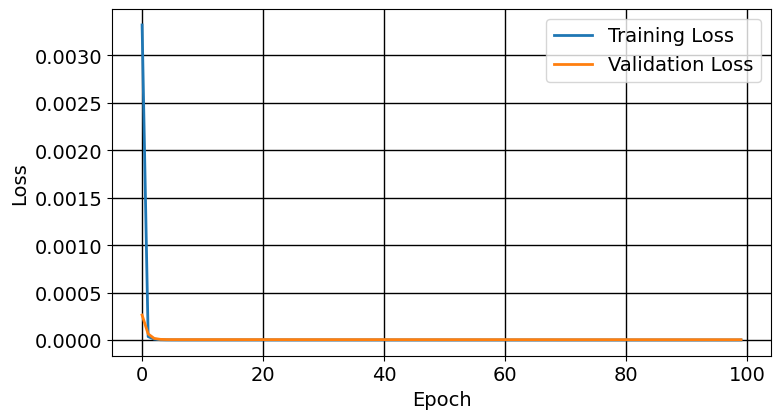

Train MSE: 0.000003
Validation MSE: 0.000006
13456/13456 ━━━━━━━━━━━━━━━━━━━━ 6s 421us/step
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step


Train R2: 0.999989
Validation R2: 0.999976
Model 2:
Epoch 1/100


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0161 - val_loss: 2.4349e-05
Epoch 2/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0344e-05 - val_loss: 1.5117e-05
Epoch 3/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.7877e-06 - val_loss: 1.4261e-05
Epoch 4/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.2265e-06 - val_loss: 1.4451e-05
Epoch 5/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.0312e-06 - val_loss: 1.4638e-05
Epoch 6/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.9632e-06 - val_loss: 1.4837e-05
Epoch 7/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.9956e-06 - val_loss: 1.4936e-05
Epoch 8/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.9620e-06 - val_loss: 1.4799e-05
Epoch 9/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.9166e-06 - val_loss: 1.4936e-05
Epoch 10/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.8678e-06 - val_loss: 1.4920e-05
Epoch 11/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.8

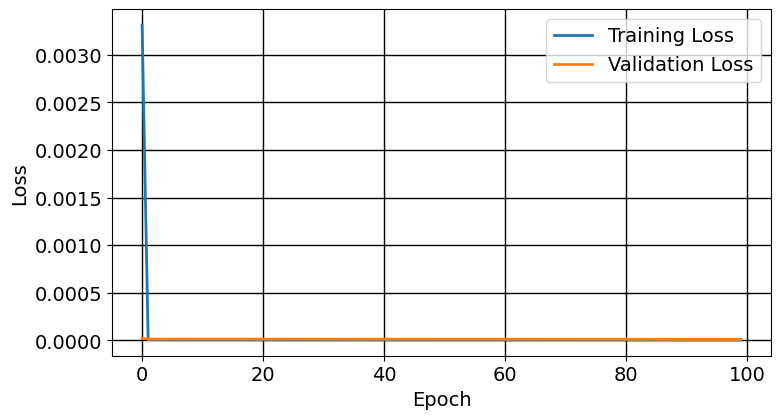

Train MSE: 0.000005
Validation MSE: 0.000012
13456/13456 ━━━━━━━━━━━━━━━━━━━━ 5s 381us/step
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step


Train R2: 0.999978
Validation R2: 0.999948
Model 3:
Epoch 1/100


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - loss: 0.0171 - val_loss: 6.3113e-04
Epoch 2/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - loss: 2.0058e-04 - val_loss: 1.8310e-04
Epoch 3/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - loss: 9.2961e-05 - val_loss: 8.7534e-05
Epoch 4/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - loss: 6.4884e-05 - val_loss: 7.1350e-05
Epoch 5/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - loss: 5.6156e-05 - val_loss: 7.0999e-05
Epoch 6/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - loss: 5.1928e-05 - val_loss: 7.0178e-05
Epoch 7/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - loss: 4.9530e-05 - val_loss: 6.8761e-05
Epoch 8/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - loss: 4.7991e-05 - val_loss: 6.8884e-05
Epoch 9/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 4.6072e-05 - val_loss: 6.4641e-05
Epoch 10/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - loss: 4.4934e-05 - val_loss: 6.3433e-05
Epoch 11/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 

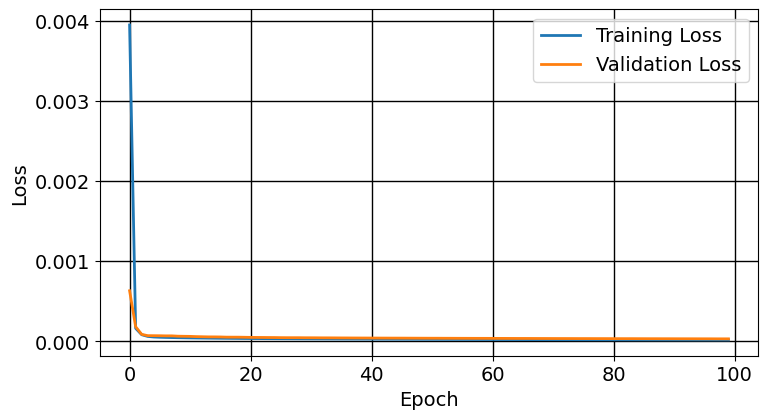

Train MSE: 0.000018
Validation MSE: 0.000032
13456/13456 ━━━━━━━━━━━━━━━━━━━━ 5s 384us/step
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step


Train R2: 0.999929
Validation R2: 0.999865
Model 4:
Epoch 1/100


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - loss: 0.0288 - val_loss: 0.0031
Epoch 2/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - loss: 5.1345e-04 - val_loss: 0.0014
Epoch 3/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - loss: 2.4272e-04 - val_loss: 8.3721e-04
Epoch 4/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - loss: 1.5046e-04 - val_loss: 5.7639e-04
Epoch 5/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - loss: 1.1543e-04 - val_loss: 4.4904e-04
Epoch 6/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - loss: 1.0015e-04 - val_loss: 3.8462e-04
Epoch 7/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - loss: 9.0303e-05 - val_loss: 3.3753e-04
Epoch 8/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - loss: 8.4364e-05 - val_loss: 3.1531e-04
Epoch 9/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - loss: 7.9400e-05 - val_loss: 2.8607e-04
Epoch 10/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - loss: 7.4486e-05 - val_loss: 2.6393e-04
Epoch 11/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/st

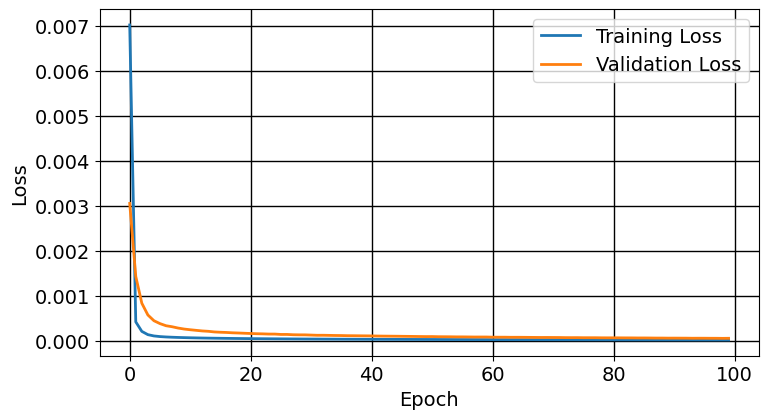

Train MSE: 0.000021
Validation MSE: 0.000059
13456/13456 ━━━━━━━━━━━━━━━━━━━━ 5s 371us/step
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 1s 384us/step


Train R2: 0.999913
Validation R2: 0.999749


In [139]:
tr_mse, vl_mse, tr_r2, vl_r2 = [], [], [], []
for n_layers in [1,2,3,4]:
    print(f"Model {n_layers}:")
    model = create_model(n_layers)
    history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=512, 
                    validation_data=(X_val, y_val), 
                    verbose=1)
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(8.5,4.5))
    plt.grid(True,linewidth=1,color='black',alpha=1)
    plt.plot(range(len(train_loss)), train_loss, linewidth=2, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, linewidth=2, label='Validation Loss')
    plt.xlabel('Epoch',color='black',fontsize=14)
    plt.ylabel('Loss',color='black',fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(fontsize=14)
    plt.show()
    
    train_mse = model.evaluate(X_train, y_train, verbose=0)
    train_mse = "{:.6f}".format(train_mse)
    print("Train MSE:",train_mse)
    val_mse = model.evaluate(X_val, y_val, verbose=0)
    val_mse = "{:.6f}".format(val_mse)
    print("Validation MSE:",val_mse)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_val)
    train_r2 = r2_score(y_train[:], train_preds)
    val_r2 = r2_score(y_val[:], test_preds)
    print("Train R2:",round(train_r2,6))
    print("Validation R2:",round(val_r2,6))
    tr_mse.append(train_mse)
    vl_mse.append(val_mse)
    tr_r2.append(train_r2)
    vl_r2.append(val_r2)
    model_filename = f"RNN_SoC_Final{n_layers}.h5"
    model.save(model_filename)  # Save the model to a separate file

## Performance Metrics

In [141]:
from tabulate import tabulate

tr_mse = [float(el) for el in tr_mse]
vl_mse = [float(el) for el in vl_mse]
tr_r2 = [float(el) for el in tr_r2]
vl_r2 = [float(el) for el in vl_r2]

res = []
model_info = [1,2,3,4]
nodes = [256,128,64,32]

for i in range(len(model_info)):
  el = []
  el.append(model_info[i])
  el.append(nodes[i])
  el.append(tr_mse[i]*100)
  el.append(vl_mse[i]*100)
  el.append(tr_r2[i]*100)
  el.append(vl_r2[i]*100)
  res.append(el)
cols = ["Model","Nodes in Hidden Layer","Train MSE","Validation MSE","Train R2","Validation R2"]

print(tabulate(res, headers=cols, tablefmt="grid", colalign=("center", "center", "center", "center", "center", "center")))

+---------+-------------------------+-------------+------------------+------------+-----------------+
|  Model  |  Nodes in Hidden Layer  |  Train MSE  |  Validation MSE  |  Train R2  |  Validation R2  |
+=========+=========================+=============+==================+============+=================+
|    1    |           256           |   0.0003    |      0.0006      |  99.9989   |     99.9976     |
+---------+-------------------------+-------------+------------------+------------+-----------------+
|    2    |           128           |   0.0005    |      0.0012      |  99.9978   |     99.9948     |
+---------+-------------------------+-------------+------------------+------------+-----------------+
|    3    |           64            |   0.0018    |      0.0032      |  99.9929   |     99.9865     |
+---------+-------------------------+-------------+------------------+------------+-----------------+
|    4    |           32            |   0.0021    |      0.0059      |  99.9913   

After analysing the performance metrics, the optimal number of nodes was found to be **256** as it had the least MSE and highest R2 score.

In [142]:
from keras import models
path = "RNN_SoC_Final1.h5"
opt_model = models.load_model(path)
opt_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)        │ (None, 256)            │        66,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,075 (262.02 KB)

 Trainable params: 67,073 (262.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Model Testing

In [143]:
def plot_predictions(test, predicted):
    plt.figure(figsize=(8.5,4.5))
    plt.grid(True,linewidth=1,color='black',alpha=1)
    plt.plot(test, color="lime", label="Actual SoC",linewidth=2.75, linestyle='dashed')
    plt.plot(predicted, color="red", label="Predicted SoC",linewidth=2.75, linestyle='dotted')
    plt.ylabel("SoC [%]",color='black',fontsize=14)
    plt.xlabel("Time [s]",color='black',fontsize=14)
    plt.xlim(0,len(test)+100)
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(fontsize=14)
    plt.show()

def return_mse(test, predicted):
    mse = mean_squared_error(test, predicted)
    print("Test MSE: {:.6f}.".format(mse))
def return_r2(test, predicted):
    r2 = r2_score(test, predicted)
    print("Test R2 {:.6f}.".format(r2))

### Test Datasets

228/574 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\4231373930.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst1 = df_tst1.fillna(method = 'bfill')


574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step


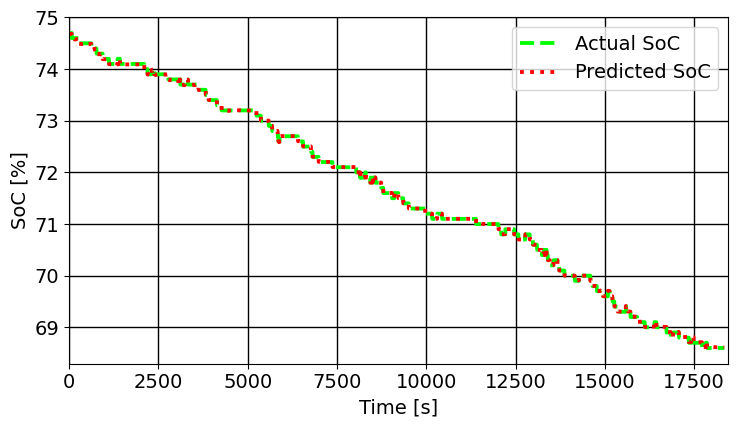

Test MSE: 0.000045.
Test R2 0.999986.


In [144]:
df_tst1 = pd.read_csv('TripA09.csv')
df_tst1 = df_tst1.fillna(method = 'bfill')
df_tst1 = df_tst1[:].loc[:,attr]
actual_soc1 = df_tst1.loc[:,"SoC [%]"].values
act_soc1 = df_tst1.loc[:,"SoC [%]"].values

inputs = df_tst1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mse1))
r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(r2_1))

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\2488056845.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst2 = df_tst2.fillna(method = 'bfill')


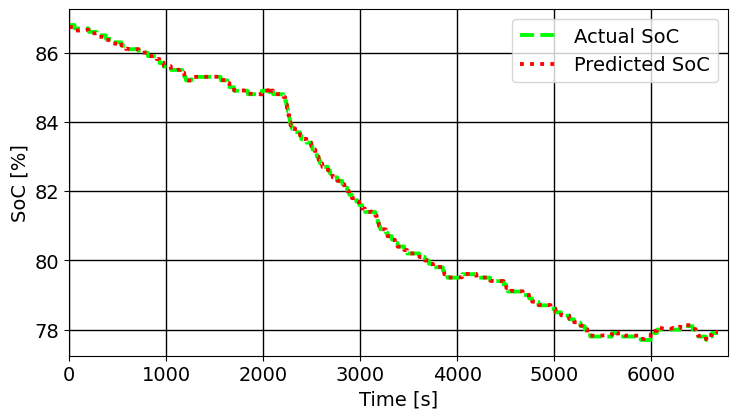

Test MSE: 0.000446.
Test R2 0.999957.


In [145]:
df_tst2 = pd.read_csv('TripA17.csv')
df_tst2 = df_tst2.fillna(method = 'bfill')
df_tst2 = df_tst2[:].loc[:,attr]
actual_soc2 = df_tst2.loc[:,"SoC [%]"].values
act_soc2 = df_tst2.loc[:,"SoC [%]"].values

inputs = df_tst2.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc2.reshape(-1,1))
X_test2, y_test2 = split_sequence(inputs, n_steps)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], features)

predicted_soc2 = opt_model.predict(X_test2)
predicted_soc2 = sc2.inverse_transform(predicted_soc2)

plot_predictions(actual_soc2,predicted_soc2)
mse2 = mean_squared_error(actual_soc2[0:inputs.shape[0]-1],predicted_soc2)
print("Test MSE: {:.6f}.".format(mse2))
r2_2 = r2_score(actual_soc2[0:inputs.shape[0]-1],predicted_soc2)
print("Test R2 {:.6f}.".format(r2_2))

326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\885310300.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst3 = df_tst3.fillna(method = 'bfill')


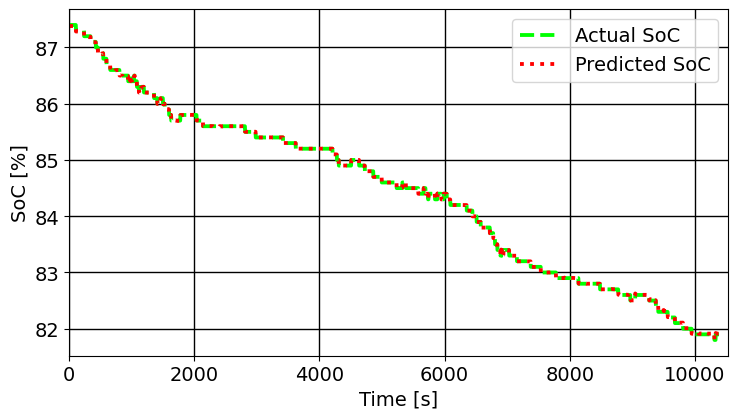

Test MSE: 0.000039.
Test R2 0.999983.


In [146]:
df_tst3 = pd.read_csv('TripA23.csv')
df_tst3 = df_tst3.fillna(method = 'bfill')
df_tst3 = df_tst3[:].loc[:,attr]
actual_soc3 = df_tst3.loc[:,"SoC [%]"].values
act_soc3 = df_tst3.loc[:,"SoC [%]"].values

inputs = df_tst3.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc3.reshape(-1,1))
X_test3, y_test3 = split_sequence(inputs, n_steps)
X_test3 = X_test3.reshape(X_test3.shape[0], X_test3.shape[1], features)

predicted_soc3 = opt_model.predict(X_test3)
predicted_soc3 = sc2.inverse_transform(predicted_soc3)

plot_predictions(actual_soc3,predicted_soc3)
mse3 = mean_squared_error(actual_soc3[0:inputs.shape[0]-1],predicted_soc3)
print("Test MSE: {:.6f}.".format(mse3))
r2_3 = r2_score(actual_soc3[0:inputs.shape[0]-1],predicted_soc3)
print("Test R2 {:.6f}.".format(r2_3))

362/437 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\923861088.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst4 = df_tst4.fillna(method = 'bfill')


437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


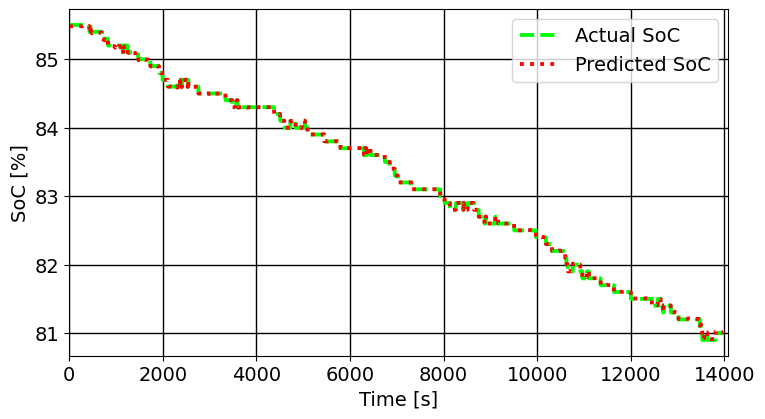

Test MSE: 0.000048.
Test R2 0.999972.


In [147]:
df_tst4 = pd.read_csv('TripA30.csv')
df_tst4 = df_tst4.fillna(method = 'bfill')
df_tst4 = df_tst4[:].loc[:,attr]
actual_soc4 = df_tst4.loc[:,"SoC [%]"].values
act_soc4 = df_tst4.loc[:,"SoC [%]"].values

inputs = df_tst4.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc4.reshape(-1,1))
X_test4, y_test4 = split_sequence(inputs, n_steps)
X_test4 = X_test4.reshape(X_test4.shape[0], X_test4.shape[1], features)

predicted_soc4 = opt_model.predict(X_test4)
predicted_soc4 = sc2.inverse_transform(predicted_soc4)

plot_predictions(actual_soc4,predicted_soc4)
mse4 = mean_squared_error(actual_soc4[0:inputs.shape[0]-1],predicted_soc4)
print("Test MSE: {:.6f}.".format(mse4))
r2_4 = r2_score(actual_soc4[0:inputs.shape[0]-1],predicted_soc4)
print("Test R2 {:.6f}.".format(r2_4))

356/504 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\195861478.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst5 = df_tst5.fillna(method = 'bfill')


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


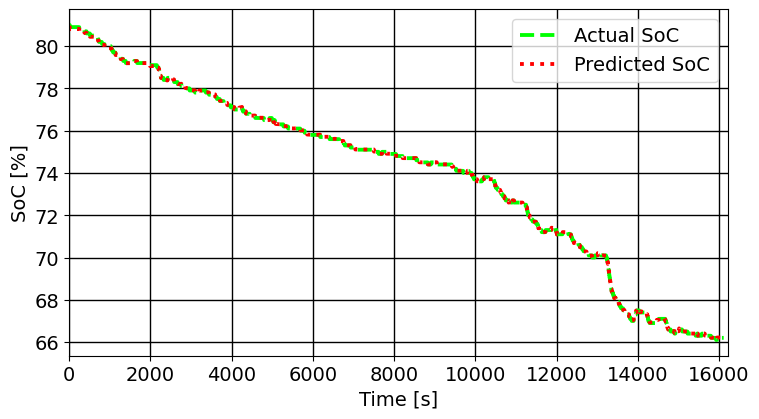

Test MSE: 0.000513.
Test R2 0.999971.


In [148]:
df_tst5 = pd.read_csv('TripB02.csv')
df_tst5 = df_tst5.fillna(method = 'bfill')
df_tst5 = df_tst5[:].loc[:,attr]
actual_soc5 = df_tst5.loc[:,"SoC [%]"].values
act_soc5 = df_tst5.loc[:,"SoC [%]"].values

inputs = df_tst5.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc5.reshape(-1,1))
X_test5, y_test5 = split_sequence(inputs, n_steps)
X_test5 = X_test5.reshape(X_test5.shape[0], X_test5.shape[1], features)

predicted_soc5 = opt_model.predict(X_test5)
predicted_soc5 = sc2.inverse_transform(predicted_soc5)

plot_predictions(actual_soc5,predicted_soc5)
mse5 = mean_squared_error(actual_soc5[0:inputs.shape[0]-1],predicted_soc5)
print("Test MSE: {:.6f}.".format(mse5))
r2_5 = r2_score(actual_soc5[0:inputs.shape[0]-1],predicted_soc5)
print("Test R2 {:.6f}.".format(r2_5))

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\327712705.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst6 = df_tst6.fillna(method = 'bfill')


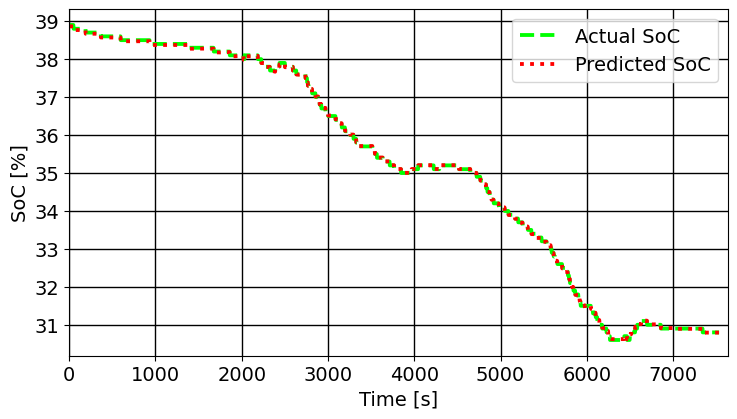

Test MSE: 0.000337.
Test R2 0.999959.


In [149]:
df_tst6 = pd.read_csv('TripB11.csv')
df_tst6 = df_tst6.fillna(method = 'bfill')
df_tst6 = df_tst6[:].loc[:,attr]
actual_soc6 = df_tst6.loc[:,"SoC [%]"].values
act_soc6 = df_tst6.loc[:,"SoC [%]"].values

inputs = df_tst6.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc6.reshape(-1,1))
X_test6, y_test6 = split_sequence(inputs, n_steps)
X_test6 = X_test6.reshape(X_test6.shape[0], X_test6.shape[1], features)

predicted_soc6 = opt_model.predict(X_test6)
predicted_soc6 = sc2.inverse_transform(predicted_soc6)

plot_predictions(actual_soc6,predicted_soc6)
mse6 = mean_squared_error(actual_soc6[0:inputs.shape[0]-1],predicted_soc6)
print("Test MSE: {:.6f}.".format(mse6))
r2_6 = r2_score(actual_soc6[0:inputs.shape[0]-1],predicted_soc6)
print("Test R2 {:.6f}.".format(r2_6))

309/373 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\4284390979.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst7 = df_tst7.fillna(method = 'bfill')


373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step


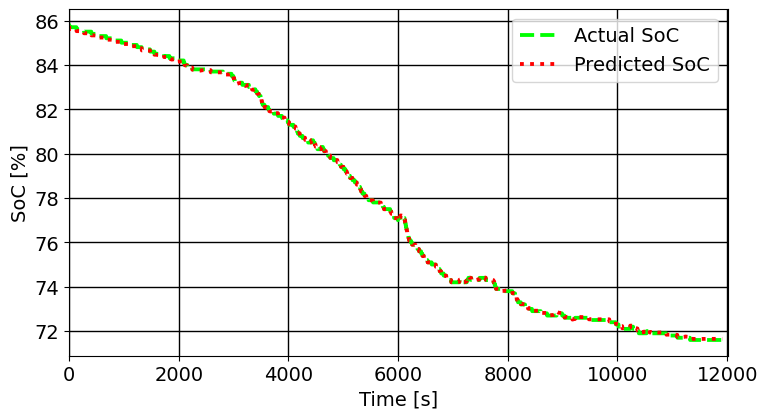

Test MSE: 0.001225.
Test R2 0.999953.


In [150]:
df_tst7 = pd.read_csv('TripB19.csv')
df_tst7 = df_tst7[:].loc[:,attr]
df_tst7 = df_tst7.fillna(method = 'bfill')
actual_soc7 = df_tst7.loc[:,"SoC [%]"].values
act_soc7 = df_tst7.loc[:,"SoC [%]"].values

inputs = df_tst7.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc7.reshape(-1,1))
X_test7, y_test7 = split_sequence(inputs, n_steps)
X_test7 = X_test7.reshape(X_test7.shape[0], X_test7.shape[1], features)

predicted_soc7 = opt_model.predict(X_test7)
predicted_soc7 = sc2.inverse_transform(predicted_soc7)

plot_predictions(actual_soc7,predicted_soc7)
mse7 = mean_squared_error(actual_soc7[0:inputs.shape[0]-1],predicted_soc7)
print("Test MSE: {:.6f}.".format(mse7))
r2_7 = r2_score(actual_soc7[0:inputs.shape[0]-1],predicted_soc7)
print("Test R2 {:.6f}.".format(r2_7))

371/892 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\908716052.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst8 = df_tst8.fillna(method = 'bfill')


892/892 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step


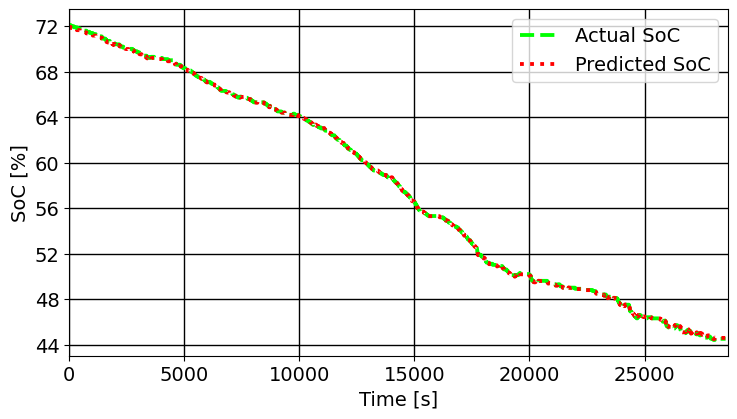

Test MSE: 0.003262.
Test R2 0.999960.


In [151]:
df_tst8 = pd.read_csv('TripB36.csv')
df_tst8 = df_tst8[:].loc[:,attr]
df_tst8 = df_tst8.fillna(method = 'bfill')
actual_soc8 = df_tst8.loc[:,"SoC [%]"].values
act_soc8 = df_tst8.loc[:,"SoC [%]"].values

inputs = df_tst8.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc8.reshape(-1,1))
X_test8, y_test8 = split_sequence(inputs, n_steps)
X_test8 = X_test8.reshape(X_test8.shape[0], X_test8.shape[1], features)

predicted_soc8 = opt_model.predict(X_test8)
predicted_soc8 = sc2.inverse_transform(predicted_soc8)

plot_predictions(actual_soc8,predicted_soc8)
mse8 = mean_squared_error(actual_soc8[0:inputs.shape[0]-1],predicted_soc8)
print("Test MSE: {:.6f}.".format(mse8))
r2_8 = r2_score(actual_soc8[0:inputs.shape[0]-1],predicted_soc8)
print("Test R2 {:.6f}.".format(r2_8))

316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\3412345231.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst9 = df_tst9.fillna(method = 'bfill')


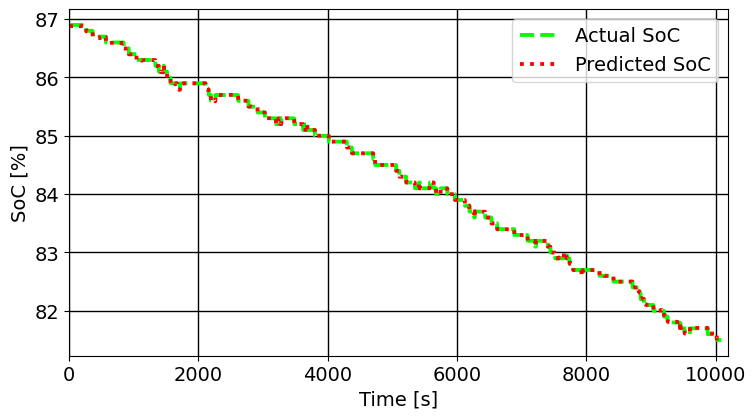

Test MSE: 0.000041.
Test R2 0.999983.


In [152]:
df_tst9 = pd.read_csv('TripA01.csv')
df_tst9 = df_tst9.fillna(method = 'bfill')
df_tst9 = df_tst9[:].loc[:,attr]
actual_soc9 = df_tst9.loc[:,"SoC [%]"].values
act_soc9 = df_tst9.loc[:,"SoC [%]"].values

inputs = df_tst9.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc9.reshape(-1,1))
X_test9, y_test9 = split_sequence(inputs, n_steps)
X_test9 = X_test9.reshape(X_test9.shape[0], X_test9.shape[1], features)

predicted_soc9 = opt_model.predict(X_test9)
predicted_soc9 = sc2.inverse_transform(predicted_soc9)

plot_predictions(actual_soc9,predicted_soc9)
mse9 = mean_squared_error(actual_soc9[0:inputs.shape[0]-1],predicted_soc9)
print("Test MSE: {:.6f}.".format(mse9))
r2_9 = r2_score(actual_soc9[0:inputs.shape[0]-1],predicted_soc9)
print("Test R2 {:.6f}.".format(r2_9))

252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\3406158509.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst10 = df_tst10.fillna(method = 'bfill')


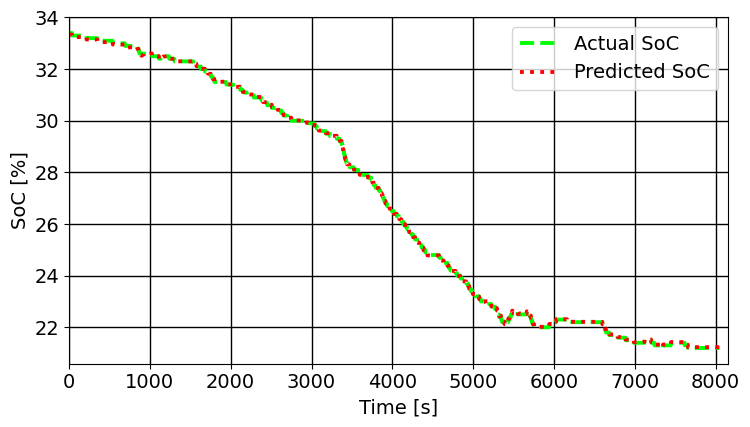

Test MSE: 0.000689.
Test R2 0.999966.


In [153]:
df_tst10 = pd.read_csv('TripB26.csv')
df_tst10 = df_tst10.fillna(method = 'bfill')
df_tst10 = df_tst10[:].loc[:,attr]
actual_soc10 = df_tst10.loc[:,"SoC [%]"].values
act_soc10 = df_tst10.loc[:,"SoC [%]"].values

inputs = df_tst10.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc10.reshape(-1,1))
X_test10, y_test10 = split_sequence(inputs, n_steps)
X_test10 = X_test10.reshape(X_test10.shape[0], X_test10.shape[1], features)

predicted_soc10 = opt_model.predict(X_test10)
predicted_soc10 = sc2.inverse_transform(predicted_soc10)

plot_predictions(actual_soc10,predicted_soc10)
mse10 = mean_squared_error(actual_soc10[0:inputs.shape[0]-1],predicted_soc10)
print("Test MSE: {:.6f}.".format(mse10))
r2_10 = r2_score(actual_soc10[0:inputs.shape[0]-1],predicted_soc10)
print("Test R2 {:.6f}.".format(r2_10))

218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\1713404544.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst11 = df_tst11.fillna(method = 'bfill')


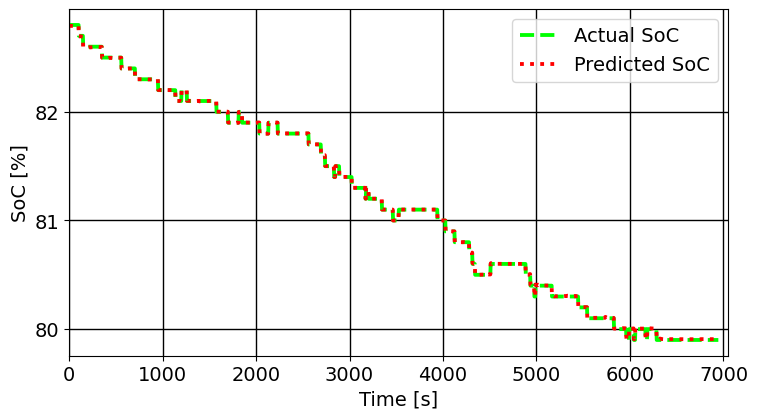

Test MSE: 0.000014.
Test R2 0.999982.


In [154]:
df_tst11 = pd.read_csv('TripA14.csv')
df_tst11 = df_tst11.fillna(method = 'bfill')
df_tst11 = df_tst11[:].loc[:,attr]
actual_soc11 = df_tst11.loc[:,"SoC [%]"].values
act_soc11 = df_tst11.loc[:,"SoC [%]"].values

inputs = df_tst11.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc11.reshape(-1,1))
X_test11, y_test11 = split_sequence(inputs, n_steps)
X_test11 = X_test11.reshape(X_test11.shape[0], X_test11.shape[1], features)

predicted_soc11 = opt_model.predict(X_test11)
predicted_soc11 = sc2.inverse_transform(predicted_soc11)

plot_predictions(actual_soc11,predicted_soc11)
mse11 = mean_squared_error(actual_soc11[0:inputs.shape[0]-1],predicted_soc11)
print("Test MSE: {:.6f}.".format(mse11))
r2_11 = r2_score(actual_soc11[0:inputs.shape[0]-1],predicted_soc11)
print("Test R2 {:.6f}.".format(r2_11))

238/423 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\2705842439.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst12 = df_tst12.fillna(method = 'bfill')


423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


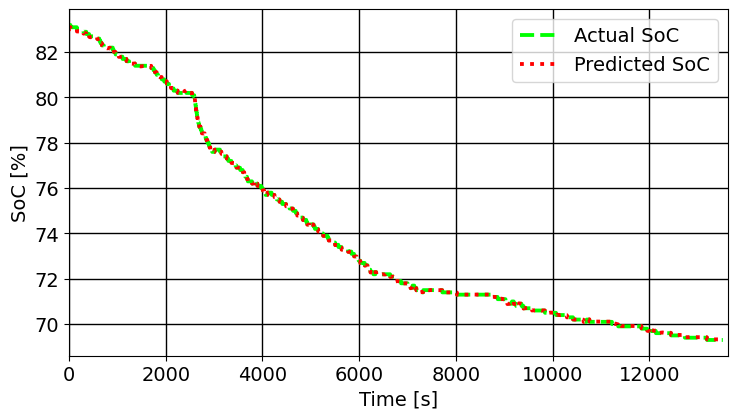

Test MSE: 0.000384.
Test R2 0.999980.


In [155]:
df_tst12 = pd.read_csv('TripB06.csv')
df_tst12 = df_tst12.fillna(method = 'bfill')
df_tst12 = df_tst12[:].loc[:,attr]
actual_soc12 = df_tst12.loc[:,"SoC [%]"].values
act_soc12 = df_tst12.loc[:,"SoC [%]"].values

inputs = df_tst12.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc12.reshape(-1,1))
X_test12, y_test12 = split_sequence(inputs, n_steps)
X_test12 = X_test12.reshape(X_test12.shape[0], X_test12.shape[1], features)

predicted_soc12 = opt_model.predict(X_test12)
predicted_soc12 = sc2.inverse_transform(predicted_soc12)

plot_predictions(actual_soc12,predicted_soc12)
mse12 = mean_squared_error(actual_soc12[0:inputs.shape[0]-1],predicted_soc12)
print("Test MSE: {:.6f}.".format(mse12))
r2_12 = r2_score(actual_soc12[0:inputs.shape[0]-1],predicted_soc12)
print("Test R2 {:.6f}.".format(r2_12))

In [156]:
from tabulate import tabulate

un_mse = [mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9,mse10,mse11,mse12]
un_r2 = [r2_1,r2_2,r2_3,r2_4,r2_5,r2_6,r2_7,r2_8,r2_9,r2_10,r2_11,r2_12]

res = []
trip_info = ["TripA09","TripA17","TripA23","TripA30","TripB02","TripB11","TripB19","TripB36","TripA01","TripB26","TripA14","TripB06"]
for i in range(len(trip_info)):
  el = []
  el.append(trip_info[i])
  el.append(round(float(un_mse[i])*100,4))
  el.append(round(float(un_r2[i])*100,4))
  res.append(el)
cols = ["Test Dataset Name","MSE","R2"]

print(tabulate(res, headers=cols, tablefmt="grid", colalign=("center", "center", "center")))

+---------------------+--------+---------+
|  Test Dataset Name  |  MSE   |   R2    |
+=====================+========+=========+
|       TripA09       | 0.0045 | 99.9986 |
+---------------------+--------+---------+
|       TripA17       | 0.0446 | 99.9957 |
+---------------------+--------+---------+
|       TripA23       | 0.0039 | 99.9983 |
+---------------------+--------+---------+
|       TripA30       | 0.0048 | 99.9972 |
+---------------------+--------+---------+
|       TripB02       | 0.0513 | 99.9971 |
+---------------------+--------+---------+
|       TripB11       | 0.0337 | 99.9959 |
+---------------------+--------+---------+
|       TripB19       | 0.1225 | 99.9953 |
+---------------------+--------+---------+
|       TripB36       | 0.3262 | 99.996  |
+---------------------+--------+---------+
|       TripA01       | 0.0041 | 99.9983 |
+---------------------+--------+---------+
|       TripB26       | 0.0689 | 99.9966 |
+---------------------+--------+---------+
|       Tri

### Results

In [157]:
un_mse100 = [el*100 for el in un_mse]
un_r2100 = [el*100 for el in un_r2]
avgmse = round(sum(un_mse100)/len(un_mse100),4)
avgr2 = round(sum(un_r2100)/len(un_r2100),4)
print("Average MSE (in %):",avgmse)
print("Average R2 (in %):",avgr2)

Average MSE (in %): 0.0587
Average R2 (in %): 99.9971


### Miscellaneous Testing

In [158]:
usm = []
urs = []

315/428 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\3083456370.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


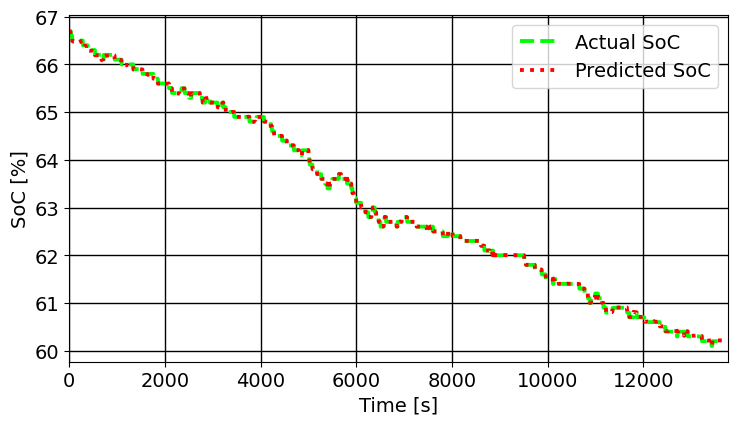

Test MSE: 0.000063.
Test R2 0.999984.


In [159]:
dft_1 = pd.read_csv('TripA05.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse4 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse4))
mis_r2_4 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_4))

337/443 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\1883886728.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step


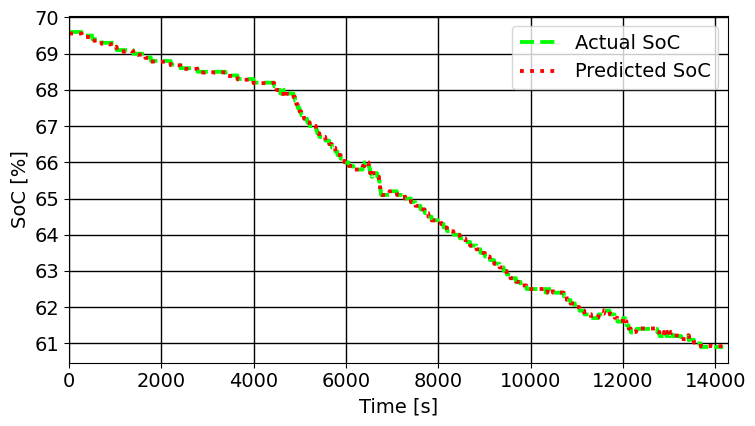

Test MSE: 0.000252.
Test R2 0.999972.


In [160]:
dft_1 = pd.read_csv('TripA10.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse6 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse6))
mis_r2_6 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_6))

352/446 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\3814902231.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


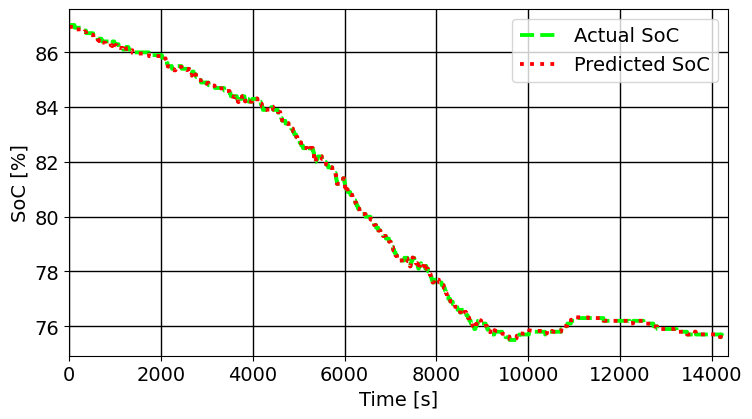

Test MSE: 0.000609.
Test R2 0.999965.


In [161]:
dft_1 = pd.read_csv('TripA11.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse7 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse7))
mis_r2_7 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_7))

224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\720959683.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


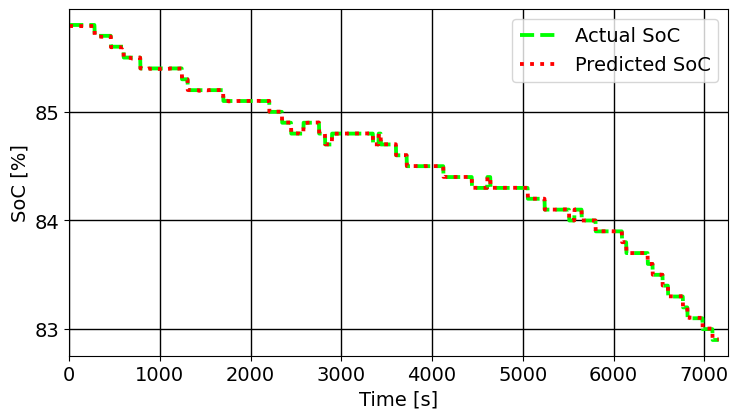

Test MSE: 0.000010.
Test R2 0.999981.


In [162]:
dft_1 = pd.read_csv('TripA13.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse8 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse8))
mis_r2_8 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_8))

276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\1771605260.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


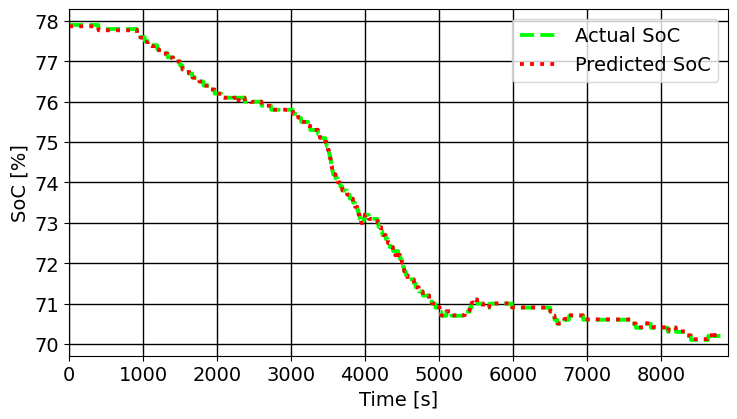

Test MSE: 0.000198.
Test R2 0.999976.


In [163]:
dft_1 = pd.read_csv('TripA18.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse11 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse11))
mis_r2_11 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_11))

355/497 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\3702527778.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


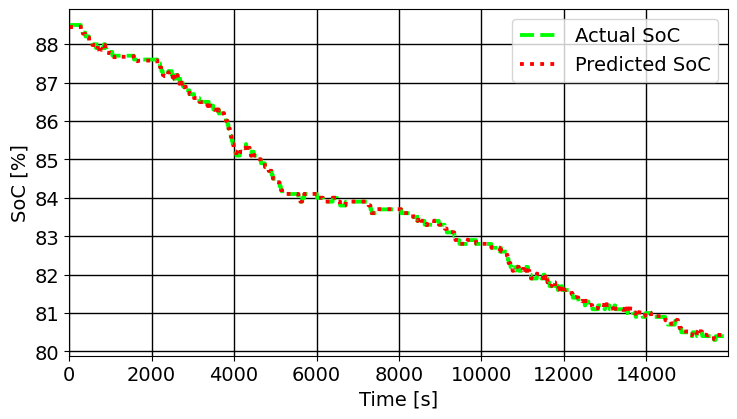

Test MSE: 0.000294.
Test R2 0.999949.


In [164]:
dft_1 = pd.read_csv('TripA19.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse12 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse12))
mis_r2_12 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_12))

234/575 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\3802988045.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


575/575 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


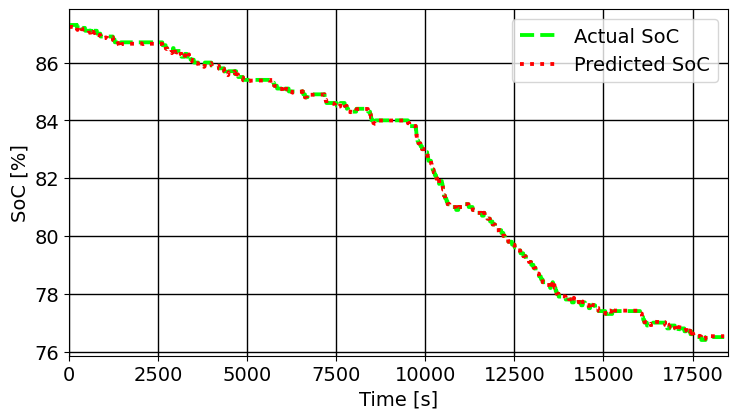

Test MSE: 0.000704.
Test R2 0.999950.


In [165]:
dft_1 = pd.read_csv('TripA22.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse14 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse14))
mis_r2_14 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_14))

238/504 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\3139477592.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step


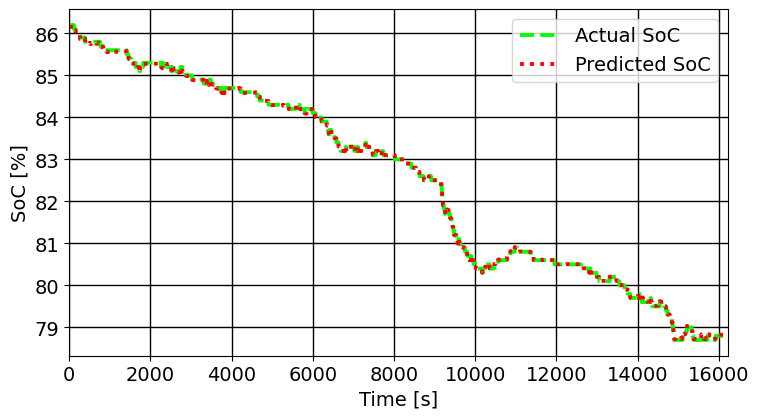

Test MSE: 0.000259.
Test R2 0.999951.


In [166]:
dft_1 = pd.read_csv('TripA26.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse16 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse16))
mis_r2_16 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_16))

214/419 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\4078843543.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


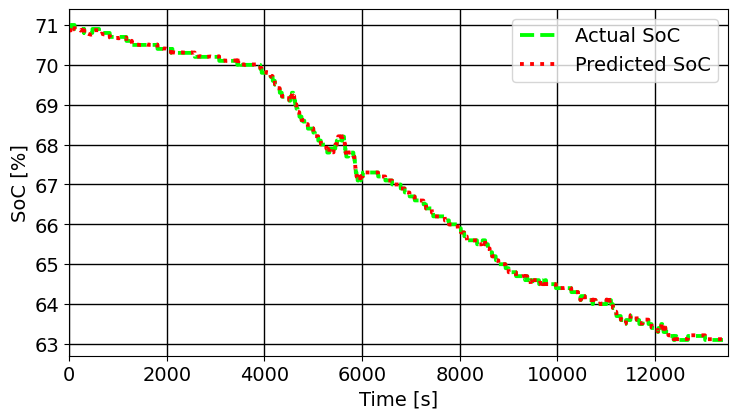

Test MSE: 0.000159.
Test R2 0.999979.


In [167]:
dft_1 = pd.read_csv('TripA29.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse18 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse18))
mis_r2_18 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_18))

200/371 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\3244251458.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


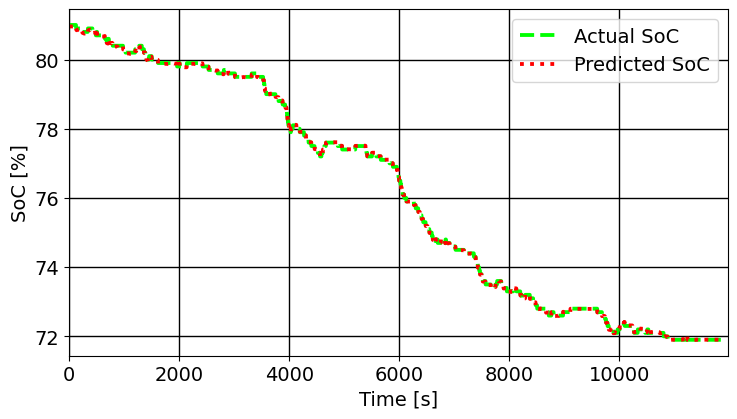

Test MSE: 0.000293.
Test R2 0.999972.


In [168]:
dft_1 = pd.read_csv('TripA31.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse19 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse19))
mis_r2_19 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_19))

In [169]:
usm1 = []
urs1 = []
usm1 = [mis_mse4,mis_mse6,mis_mse7,mis_mse8,mis_mse11,mis_mse12,mis_mse14,mis_mse16,mis_mse18,mis_mse19]
urs1 = [mis_r2_4,mis_r2_6,mis_r2_7,mis_r2_8,mis_r2_11,mis_r2_12,mis_r2_14,mis_r2_16,mis_r2_18,mis_r2_19]

In [170]:
usm2 = []
urs2 = []

244/924 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\4117885866.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


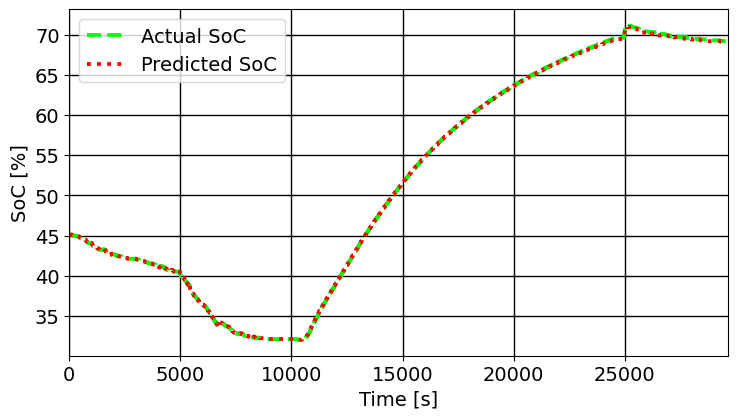

Test MSE: 0.005815.
Test R2 0.999970.


In [171]:
dft_1 = pd.read_csv('TripB04.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

216/911 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\3610025232.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


911/911 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


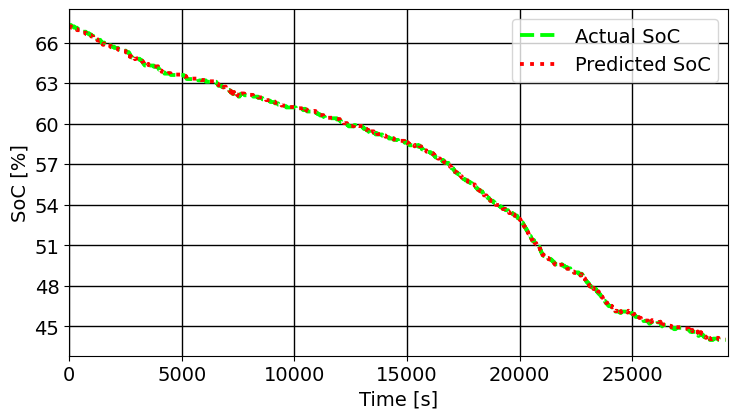

Test MSE: 0.001521.
Test R2 0.999971.


In [172]:
dft_1 = pd.read_csv('TripB08.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

1271/1271 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step


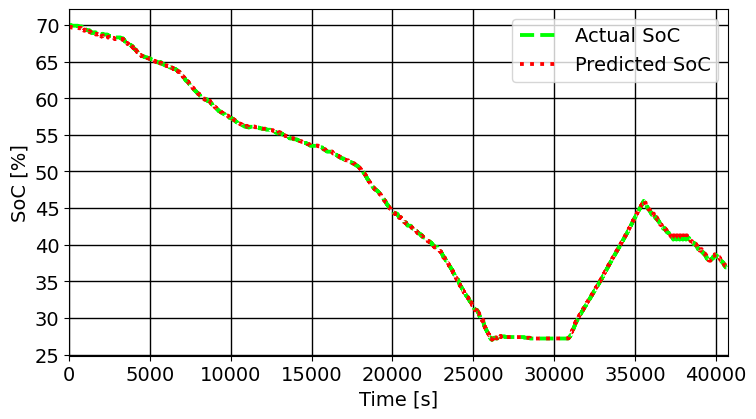

Test MSE: 0.006403.
Test R2 0.999964.


In [173]:
dft_1 = pd.read_csv('TripB09.csv')
dft_1 = dft_1[:].loc[:,attr]
dft_1 = dft_1.dropna()
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

 256/1008 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\4232011739.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


1008/1008 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step


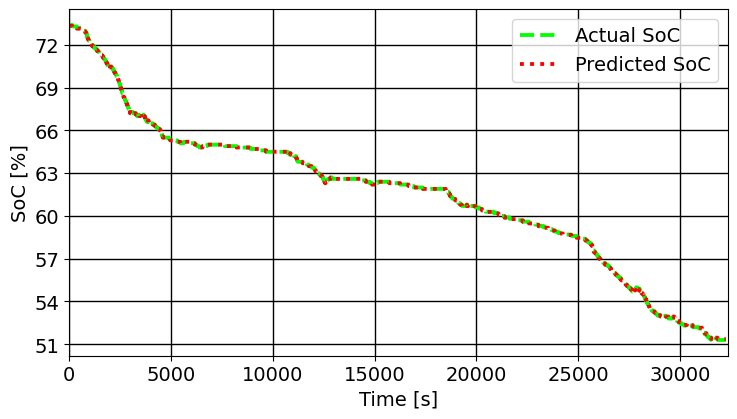

Test MSE: 0.000613.
Test R2 0.999977.


In [174]:
dft_1 = pd.read_csv('TripB12.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

 235/1195 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\539066025.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step


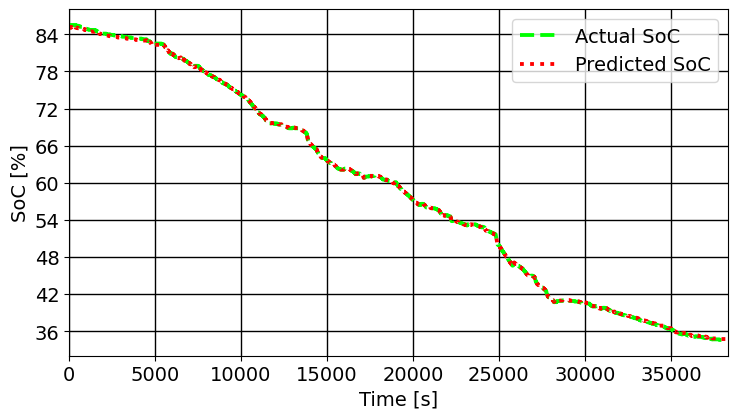

Test MSE: 0.012124.
Test R2 0.999958.


In [175]:
dft_1 = pd.read_csv('TripB14.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

346/488 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\2333007882.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step


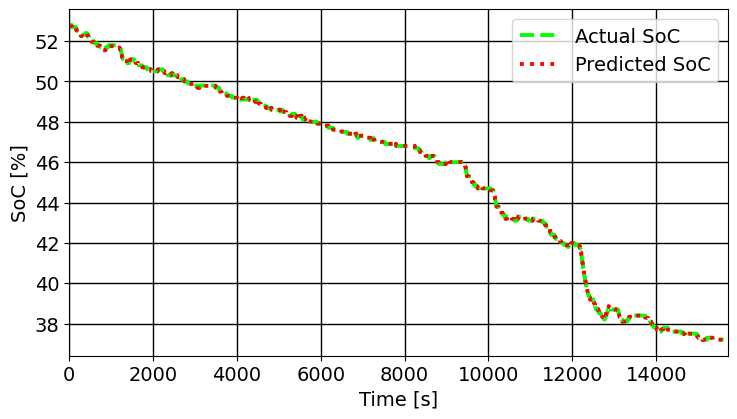

Test MSE: 0.000361.
Test R2 0.999984.


In [176]:
dft_1 = pd.read_csv('TripB17.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

334/347 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\2033045557.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step


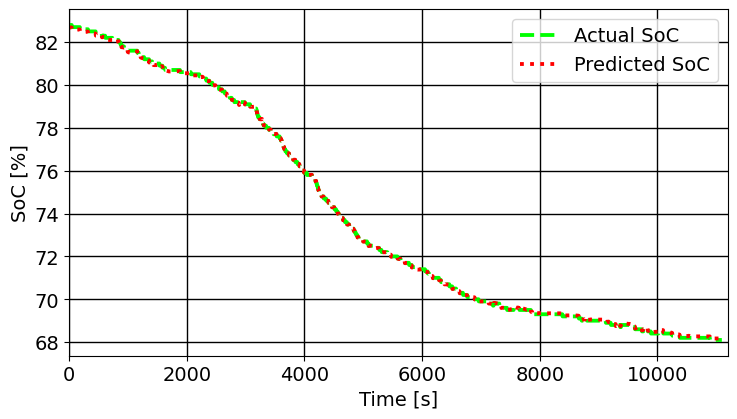

Test MSE: 0.002176.
Test R2 0.999917.


In [177]:
dft_1 = pd.read_csv('TripB18.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\3096730324.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


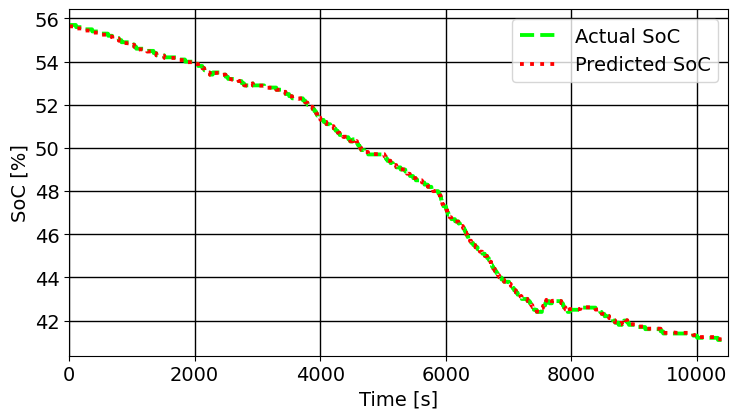

Test MSE: 0.000638.
Test R2 0.999976.


In [178]:
dft_1 = pd.read_csv('TripB21.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\2725902585.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


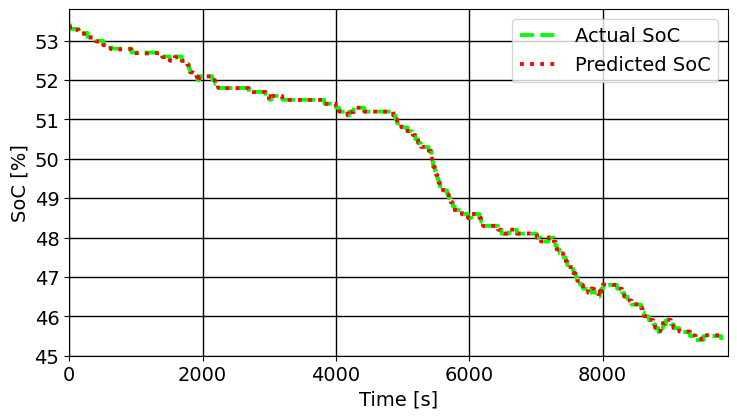

Test MSE: 0.000132.
Test R2 0.999980.


In [179]:
dft_1 = pd.read_csv('TripB24.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\3732686610.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


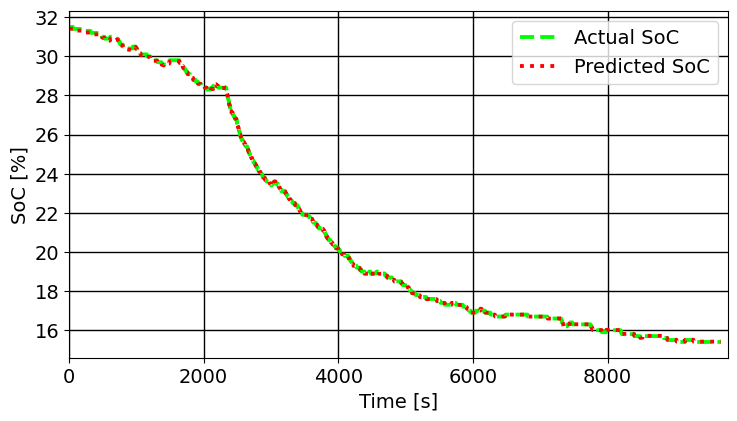

Test MSE: 0.000872.
Test R2 0.999973.


In [180]:
dft_1 = pd.read_csv('TripB29.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\2455074966.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


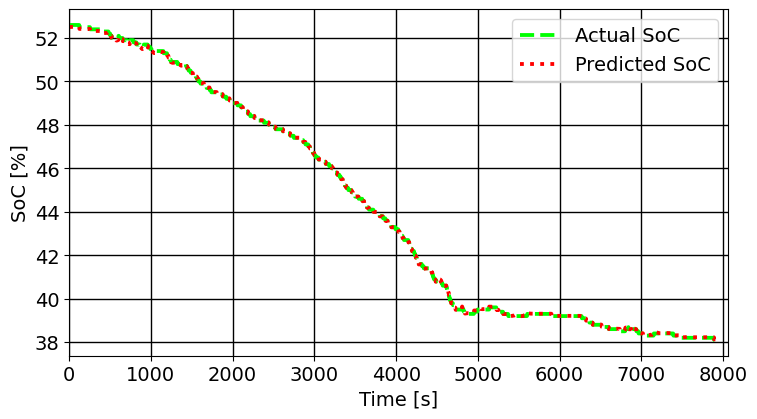

Test MSE: 0.001067.
Test R2 0.999961.


In [181]:
dft_1 = pd.read_csv('TripB32.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_22048\1184243548.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


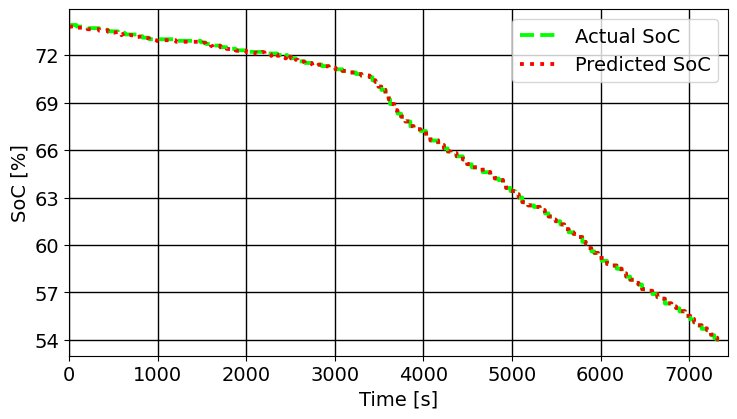

Test MSE: 0.001325.
Test R2 0.999966.


In [182]:
dft_1 = pd.read_csv('TripB34.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

238/426 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_22048\3389318454.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


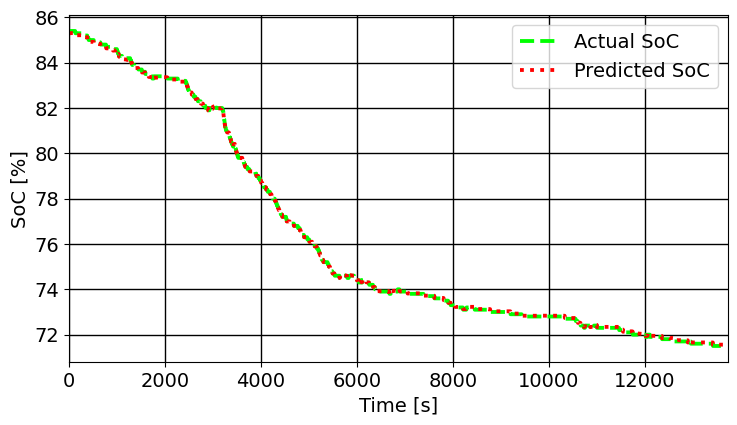

Test MSE: 0.001424.
Test R2 0.999934.


In [183]:
dft_1 = pd.read_csv('TripB35.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

In [184]:
usm = [y for x in [usm1, usm2] for y in x]
urs = [y for x in [urs1, urs2] for y in x]

In [185]:
from tabulate import tabulate

res = []
trip_info = ["TripA05","TripA10","TripA11","TripA13","TripA18","TripA19","TripA22","TripA26","TripA29","TripA31",
             "TripB04","TripB08","TripB09","TripB12","TripB14","TripB17","TripB18","TripB21","TripB24","TripB29","TripB32","TripB34",
             "TripB35"]
for i in range(len(trip_info)):
  el = []
  el.append(trip_info[i])
  el.append(round(usm[i]*100,4))
  el.append(round(urs[i]*100,4))
  res.append(el)
cols = ["Test Dataset Name","MSE","R2"]

print(tabulate(res, headers=cols, tablefmt="grid", colalign=("center", "center", "center")))

+---------------------+--------+---------+
|  Test Dataset Name  |  MSE   |   R2    |
+=====================+========+=========+
|       TripA05       | 0.0063 | 99.9984 |
+---------------------+--------+---------+
|       TripA10       | 0.0252 | 99.9972 |
+---------------------+--------+---------+
|       TripA11       | 0.0609 | 99.9965 |
+---------------------+--------+---------+
|       TripA13       | 0.001  | 99.9981 |
+---------------------+--------+---------+
|       TripA18       | 0.0198 | 99.9976 |
+---------------------+--------+---------+
|       TripA19       | 0.0294 | 99.9949 |
+---------------------+--------+---------+
|       TripA22       | 0.0704 | 99.995  |
+---------------------+--------+---------+
|       TripA26       | 0.0259 | 99.9951 |
+---------------------+--------+---------+
|       TripA29       | 0.0159 | 99.9979 |
+---------------------+--------+---------+
|       TripA31       | 0.0293 | 99.9972 |
+---------------------+--------+---------+
|       Tri

### Results

In [186]:
usm100 = [el*100 for el in usm]
urs100 = [el*100 for el in urs]
avgmse = round(sum(usm100)/len(usm100),4)
avgr2 = round(sum(urs100)/len(urs100),4)
print("Average MSE (in %):",avgmse)
print("Average R2 (in %):",avgr2)

Average MSE (in %): 0.1622
Average R2 (in %): 99.9966


***